# TSEMO Matlab vs. Python Comparision

This notebook does a comparison of the experiments on optimizing DTLZ2 using the Matlab and Python versions of TSEMO.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from summit.utils.dataset import DataSet
from summit.utils.multiobjective import pareto_efficient, HvI

In [9]:
def calculate_mo_data(data):
    y_pareto, _ = pareto_efficient(data,maximize=False)
    percent_pareto = y_pareto.shape[0]/data.shape[0]
    hv = HvI.hypervolume(y_pareto, [11,11])
    return hv, percent_pareto, len(y_pareto)

In [27]:
#Read in python data and calculate statistics
python_data = [DataSet.read_csv(f'data/python/experiment_{i}.csv') for i in range(20)]
mo_data = [calculate_mo_data(data[['y_0', 'y_1']].data_to_numpy())
           for data in python_data]
hv_python = [m[0] for m in mo_data]
hv_average_python = np.mean(hv_python)
hv_std_python = np.std(hv_python)

In [26]:
# Read in Matlab data and calculate statistics
matlab_data = [pd.read_csv(f'data/matlab/experiment_{i}/Y.csv',header=None)
               for i in range(1, 21)]
mo_matlab_data = [calculate_mo_data(data.to_numpy()) for data in matlab_data]
hv_matlab = [m[0] for m in mo_matlab_data]
hv_average_matlab = np.mean(hv_matlab)
hv_std_matlab = np.std(hv_matlab)

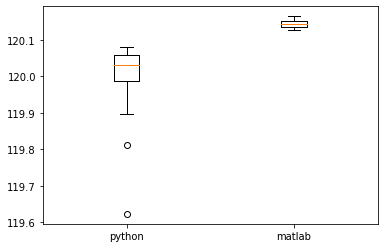

In [32]:
fig, ax = plt.subplots(1)
hvs = np.array([hv_python, hv_matlab]).T
_ = ax.boxplot(hvs, labels=['python', 'matlab'])
fig.savefig('20200604_matlab_tsemo_comparison.png', dpi=300)